In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Arial']

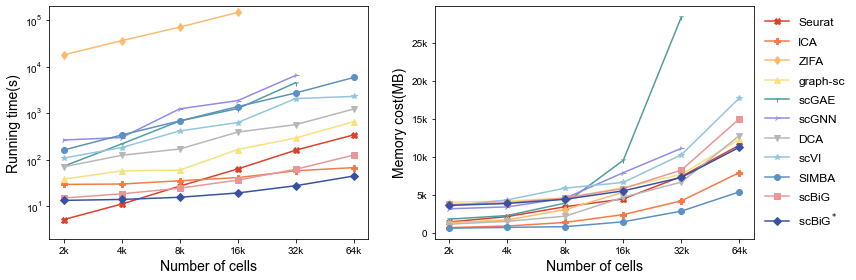

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), constrained_layout=True)
fig.tight_layout(h_pad=2)
colors = ['#D9412B', '#F67948', '#FABB6E', '#F9E07F', '#4F9D9D', '#8f8ce7','#B7B7B7','#92C5DE', '#5C90C2', '#E79796','#3951A2']

df1 = pd.DataFrame()
df2 = pd.DataFrame()
datasets = ['2000','4000','8000','16000','32000','64000']
for dataset in datasets:
    dir0 = '../'
    dir1 = '{}'.format(dataset)
    dir2 = 'data_{}.h5'.format(dataset)

    Times = []
    Usages = []
    methods = ['Seurat', 'ICA', 'ZIFA', 'graph-sc', 'scGAE', 'scGNN', 'DCA', 'scVI','SIMBA', 'scBiG','scBiG_hvg2k']
    for method in methods:
#         print('----------------method: {} ----------------- '.format(method))
        r = np.load(os.path.join(dir0, 'results/time_memory/{}/record_cell{}_{}.npz'.format(dataset, dataset, method)))
        time = r['time'].tolist()
        memory_usage = r['memory_usage'].tolist()
        Times.append(time)
        Usages.append(memory_usage)
        
    df11 = pd.DataFrame(Times, index=methods)
    df1 = pd.concat([df1, df11], axis=1)
    
    df22 = pd.DataFrame(Usages, index=methods)
    df2 = pd.concat([df2, df22], axis=1)

df1.columns=datasets
df1 = df1.T
df1[df1==0] = None
# print(df1)

df2.columns=datasets
df2 = df2.T
df2[df2==0] = None
# print(df2)

x=list(df1.index)
Seurat=df1['Seurat'].values
ICA=df1['ICA'].values
ZIFA=df1['ZIFA'].values
graphsc=df1['graph-sc'].values
scGAE=df1['scGAE'].values
scGNN=df1['scGNN'].values
DCA=df1['DCA'].values
scVI=df1['scVI'].values
SIMBA=df1['SIMBA'].values
scBiG=df1['scBiG'].values
scBiG_hvg2k=df1['scBiG_hvg2k'].values
x = datasets
xs = ['2k','4k','8k','16k','32k','64k']
plt3=axes[0]
plt4=axes[1]
plt3.plot(x,Seurat,marker='X',label='Seurat',color=colors[0])
plt3.plot(x,ICA,marker='P',label='ICA',color=colors[1])
plt3.plot(x,ZIFA,marker='d',label='ZIFA',color=colors[2])
plt3.plot(x,graphsc,marker='^',label='graph-sc',color=colors[3])
plt3.plot(x,scGAE,marker='1',label='scGAE',color=colors[4])
plt3.plot(x,scGNN,marker='4',label='scGNN',color=colors[5])
plt3.plot(x,DCA,marker='v',label='DCA',color=colors[6])
plt3.plot(x,scVI,marker='*',label='scVI',color=colors[7])
plt3.plot(x,SIMBA,marker='o',label='SIMBA',color=colors[8])
plt3.plot(x,scBiG,marker='s',label='scBiG',color=colors[9])
plt3.plot(x,scBiG_hvg2k,marker='D',label='scBiG$^*$',color=colors[10])
plt3.set_xticklabels(xs, fontdict={'fontsize': 10})
plt3.set_xlabel('Number of cells',fontsize=14)
plt3.set_ylabel('Running time(s)',fontsize=14)
plt3.set_yscale('symlog')
plt3.set_ylim(2,2*10e4)

x=list(df2.index)
Seurat=df2['Seurat'].values
ICA=df2['ICA'].values
ZIFA=df2['ZIFA'].values
graphsc=df2['graph-sc'].values
scGAE=df2['scGAE'].values
scGNN=df2['scGNN'].values
DCA=df2['DCA'].values
scVI=df2['scVI'].values
SIMBA=df2['SIMBA'].values
scBiG=df2['scBiG'].values
scBiG_hvg2k=df2['scBiG_hvg2k'].values
x = datasets
xs = ['2k','4k','8k','16k','32k','64k']
ys = ['0','0','5k','10k','15k','20k','25k']
plt4.plot(x,Seurat,marker='X',label='Seurat',color=colors[0])
plt4.plot(x,ICA,marker='P',label='ICA',color=colors[1])
plt4.plot(x,ZIFA,marker='d',label='ZIFA',color=colors[2])
plt4.plot(x,graphsc,marker='^',label='graph-sc',color=colors[3])
plt4.plot(x,scGAE,marker='1',label='scGAE',color=colors[4])
plt4.plot(x,scGNN,marker='4',label='scGNN',color=colors[5])
plt4.plot(x,DCA,marker='v',label='DCA',color=colors[6])
plt4.plot(x,scVI,marker='*',label='scVI',color=colors[7])
plt4.plot(x,SIMBA,marker='o',label='SIMBA',color=colors[8])
plt4.plot(x,scBiG,marker='s',label='scBiG',color=colors[9])
plt4.plot(x,scBiG_hvg2k,marker='D',label='scBiG$^*$',color=colors[10])
plt4.legend(bbox_to_anchor=(1, 1),frameon=False,labelspacing=0.75,fontsize=12)
plt4.set_xticklabels(xs, fontdict={'fontsize': 10})
plt4.set_yticklabels(ys, fontdict={'fontsize': 10})
plt4.set_xlabel('Number of cells',fontsize=14)
plt4.set_ylabel('Memory cost(MB)',fontsize=14)
plt.tight_layout(h_pad=2, w_pad=2.5)
plt.savefig('../figures/7time/celltime.svg', dpi=300, format='svg', bbox_inches='tight')
plt.show()